In [51]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/insurance/insurance.csv')

In [52]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [53]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [54]:
print('Rows:', df.shape[0], '\nColumns:', df.shape[1])

Rows: 1338 
Columns: 7


In [55]:
print('Column names:', df.columns.tolist())

Column names: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


In [56]:
print('Null values:\n', df.isnull().sum())

Null values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [57]:
print('Unique values:\n', df.nunique())

Unique values:
 age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [59]:
df.sex = df['sex'].astype('category')
df.smoker = df['smoker'].astype('category')
df.region = df['region'].astype('category')

In [60]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Observations**
1. Average Age of the primary beneficiary is 39.2 and the maximum age is 64.
2. Average BMI is 30.66 (out of normal range BMI), Maximum BMI is 53.13.
3. Average Medical costs billed to health insurance is 13270, median is 9382 and maximum is 63770.
4. Median is less than mean in charges, indicating distribution is positively skewed.
5. Customer on an average has 1 child.

In [61]:
df.describe(include = 'category')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [62]:
col = df.select_dtypes(['category']).columns 
for i in range(len(col)):
    print(df[col[i]].value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


1. 676 male and 662 female, indicated sample has slightly more males than females.
2. 1064 nonsmoker and 274 smoker, indicating sample has more nonsmokers.
3. Number of claims from customer who reside in southwest region is more compared to other regions.

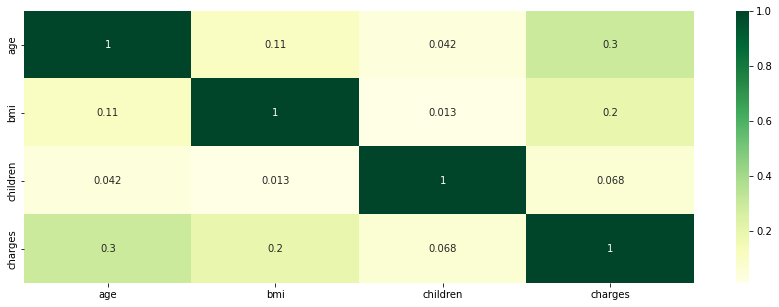

In [63]:
plt.figure(figsize = (15, 5))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGn')
plt.show()

**There is very little significant correlation between charges - age and charges - bmi**

# **Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?**

In [64]:
smoker = df.loc[df.smoker == 'yes']
smoker.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [65]:
smoker.count()

age         274
sex         274
bmi         274
children    274
smoker      274
region      274
charges     274
dtype: int64

In [66]:
non_smoker = df.loc[df.smoker == 'no']
non_smoker.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [67]:
non_smoker.count()

age         1064
sex         1064
bmi         1064
children    1064
smoker      1064
region      1064
charges     1064
dtype: int64

In [17]:
charges_yes = smoker.charges
charges_no = non_smoker.charges

In [18]:
print('Average cost charges to insurance for smoker is {} and non-smoker is {}'.format(charges_yes.mean(), charges_no.mean()))

Average cost charges to insurance for smoker is 32050.23183153284 and non-smoker is 8434.268297856204


[Text(0.5, 1.0, 'Smoker vs Charges')]

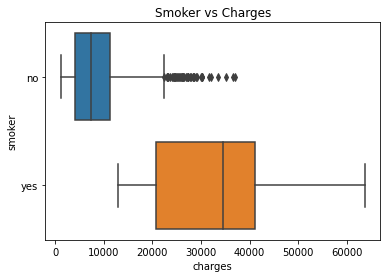

In [19]:
import seaborn as sns
sns.boxplot(x = df.charges, y = df.smoker, data = df).set(title = 'Smoker vs Charges')

In [20]:
import scipy.stats as stats 
alpha = 0.05
t_statistic, p_value = stats.ttest_ind(charges_yes, charges_no)
p_value_onetail = p_value / 2

In [21]:
print('Test statistic = {}, p-value = {}, one tail p-value = {}'.format(t_statistic, p_value, p_value_onetail))

Test statistic = 46.66492117272371, p-value = 8.271435842179102e-283, one tail p-value = 4.135717921089551e-283


In [22]:
if p_value < alpha:
    print('Conclusion: Since P value {} is less than alpha {}'.format(p_value_onetail, alpha))
    print('Reject null hypothesis that average charges for smokers are less than or equal to nonsmoker.')
else:
    print('Conclusion: Since P value {} is greater than alpha {}'.format(p_value_onetail, alpha))
    print('Failed to reject null hypothesis that average charges for smokers are less than nonsmoker')

Conclusion: Since P value 4.135717921089551e-283 is less than alpha 0.05
Reject null hypothesis that average charges for smokers are less than or equal to nonsmoker.


**We reject the null hypothesis and can conclude that people who smoke have on an average larger medical claim compared to people who don't smoke.**

# **Prove (or disprove) with statistical evidence that the BMI of females is differnt from that of males?**

In [23]:
df_male = df.loc[df.sex == 'male']
df_female = df.loc[df.sex == 'female']

In [24]:
bmi_female = df_female.bmi
bmi_male = df_male.bmi

In [25]:
print(df_female.bmi.mean())
print(df_male.bmi.mean())

30.37774924471299
30.943128698224854


In [26]:
alpha = 0.05
t_statistic, p_value = stats.ttest_ind(bmi_male, bmi_female)
p_value_onetail = p_value / 2

In [27]:
print('Test statistic = {}, p-value = {}, one tail p-value = {}'.format(t_statistic, p_value, p_value_onetail))

Test statistic = 1.696752635752224, p-value = 0.08997637178984932, one tail p-value = 0.04498818589492466


In [28]:
if p_value < alpha :
    print("Conclusion:Since P value {} is less than alpha {} ".format(p_value, alpha) )
    print("Reject Null Hypothesis  that there is no difference in bmi of men and bmi of female.")
else:
    print("Conclusion:Since P value {} is greater than alpha {} ".format(p_value, alpha))
    print("Failed to Reject Null Hypothesis  that there is difference in bmi of men and bmi of female .")

Conclusion:Since P value 0.08997637178984932 is greater than alpha 0.05 
Failed to Reject Null Hypothesis  that there is difference in bmi of men and bmi of female .


**We fail to reject the null hypothesis and can conclude that there is no difference between BMI of female and BMI of male.**

# **Is the proportion of smokers significantly different across differnet regions?**

In [29]:
contigency = pd.crosstab(df.region, df.smoker)
contigency

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


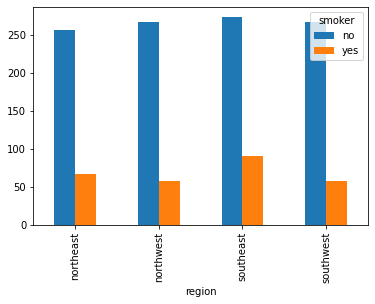

In [30]:
contigency.plot(kind = 'bar')

In [37]:
from scipy.stats import chi2_contingency
chi, pval, dof, exp_freq = chi2_contingency(contigency, correction = False)
print('chi-square statistic: {}, \npvalue: {}, \ndegree of freedom: {}, \nexpected frequencies:\n {}'.format(chi, pval, dof, exp_freq))

chi-square statistic: 7.343477761407071, 
pvalue: 0.06171954839170541, 
degree of freedom: 3, 
expected frequencies:
 [[257.65022422  66.34977578]
 [258.44544096  66.55455904]
 [289.45889387  74.54110613]
 [258.44544096  66.55455904]]


In [39]:
if pval < 0.5:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


**We failed to reject the null hypothesis and conclude that Smoker proportions is not significantly different across different regions.**

# **Is the mean BMI of women with no children, on child, and two children the same?**

In [41]:
df_female_child = df_female.loc[df_female['children'] <= 2]
df_female_child.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
9,60,female,25.84,0,no,northwest,28923.13692
11,62,female,26.29,0,yes,southeast,27808.72510


In [42]:
df_female_child.groupby([df_female_child.children]).mean().bmi

children
0    30.361522
1    30.052658
2    30.649790
Name: bmi, dtype: float64

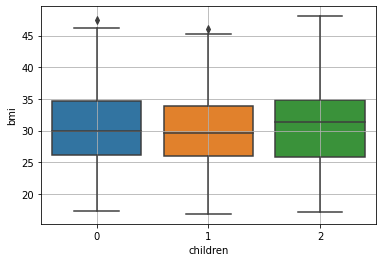

In [44]:
import matplotlib.pyplot as plt
sns.boxplot(x = 'children', y = 'bmi', data = df_female_child)
plt.grid() 
plt.show()

In [47]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula = 'bmi ~ C(children)'
model = ols(formula, df_female_child).fit()
anova_table = anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(children),2.0,24.590123,12.295062,0.334472,0.715858
Residual,563.0,20695.661583,36.759612,NaN,NaN


P value is 0.715 and it is greater than alpha (0.05). We failed to reject the null hypothesis and conclude that mean BMI of women with no children, one children, two children is same.

# **Linear Regression Modelling**

In [73]:
df['smoker'] = df['smoker'].replace(['yes', 'no'], [1, 0])
df['sex'] = df['sex'].replace(['male', 'female'], [1, 0])
df['region_southeast'] = df['region'].apply(lambda x: 1 if x == 'southeast' else 0)

In [76]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [81]:
y_data = df['charges']
x_data = df.drop(['charges', 'region'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.25)

In [82]:
model1 = LinearRegression()
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)

In [83]:
model_coef = pd.DataFrame(data = model1.coef_, index = x_test.columns)
model_coef.loc['intercept', 0] = model1.intercept_
display(model_coef)

,0
age,271.934772
sex,-397.028693
bmi,309.314923
children,501.170602
smoker,23855.444355
region_southeast,-599.253924
intercept,-11988.294886


In [85]:
import numpy as np
model_performance = pd.DataFrame(data = [r2_score(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))], index = ['R2', 'RMSE'])
display(model_performance)

,0
R2,0.740406
RMSE,6633.538095


Smoking is a huge factor as compared to other features. Just by being a smoker, the charge increases by approximately 25,000 regardless of age. Thereafter, the charges increases with age, bmi(higher health risk) and children (insurance is increasingly important with dependants).

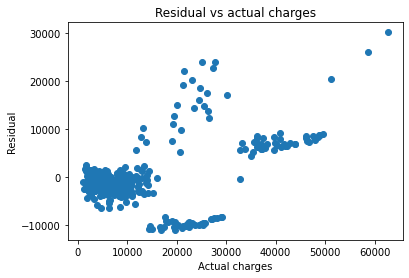

In [87]:
residual = y_test - y_pred 
plt.scatter(y_test, residual)
plt.title('Residual vs actual charges')
plt.xlabel('Actual charges');
plt.ylabel('Residual');

Positive residual means that the actual charge > predicted charge
Negative residual means that the actual charge < predicted charge

The model is great for charges less than 15,000 as the residual is within 5000. However, the model breaks down at higher charge (> 15,000) as the residual very significant. The model could over predict the actual charge by 10,000 or more, or under predict the actual charge by minimally 5,000.